# SMOTE

In [11]:
# Data Processing
import string
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [13]:
# read RData
#res = pyreadr.read_r('5v_cleandf.RData')
!pwd

/media/csuser/DATA/ARTEMIS/yale


In [14]:
#df = res["df"]
df = pd.read_csv('/media/csuser/DATA/ARTEMIS/yale/yale_triage.csv')
# df.dropna()
# df.to_csv('yale_triage.csv')

In [15]:
# df = df.dropna()
# with all the 972 columns, if you run dropna directly, there actually ends up being 0 
# remaining rows

df.reset_index(inplace=True, drop=True)
df.shape

(560486, 973)

In [18]:
keys = df.keys()
#new_keys = ['triage_vital_temp', 'triage_vital_rr', 'triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_o2', 'esi', 'age']
new_keys = ['triage_vital_temp', 'triage_vital_rr', 'triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_o2', 'age']
# reach = False

# for i in range(len(keys)):
#     if(keys[i]!='2ndarymalig' and reach==False):
#         # print(keys[i])
#         continue
#     reach = True
#     if(keys[i]!='whtblooddx'):
#         new_keys.append(keys[i])
#     else:
#         new_keys.append(keys[i])
#         break

reach = False
for i in range(len(keys)):
    if(keys[i]!='cc_abdominalcramping' and reach==False):
        continue
    reach = True
    if(keys[i]!='cc_wristpain'):
        new_keys.append(keys[i])
    else:
        new_keys.append(keys[i])
        break

new_keys.append('esi')
print(len(list(set(new_keys))))
print(len(new_keys))
#df = df[['triage_vital_temp', 'triage_vital_rr', 'triage_vital_hr', 'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_o2', 'esi', 'age', 'gender', 'arrivalmode', 'previousdispo']]
df = df[new_keys]
df = df.dropna()
df.reset_index(inplace=True, drop=True)
df.head()
len(df)


208
208


269549

In [19]:
df = df[(df["triage_vital_temp"] >= 51.8) & (df["triage_vital_temp"] <= 108.14) & (df["triage_vital_hr"] > 0) & (df["triage_vital_hr"] < 140) & (df["triage_vital_o2"] > 0) & (df["triage_vital_o2"] < 100)]
df = df.drop(df.loc[df['triage_vital_sbp'] > 400].index) # impossible
df = df.drop(df.loc[df['triage_vital_dbp'] > 400].index) # impossible
df = df.drop(df.loc[df['triage_vital_rr'] > 200].index) # impossible

/home/csuser/mambaforge/envs/tim/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


109106    2.0
141020    1.0
Name: esi, dtype: float64
(268469, 208)


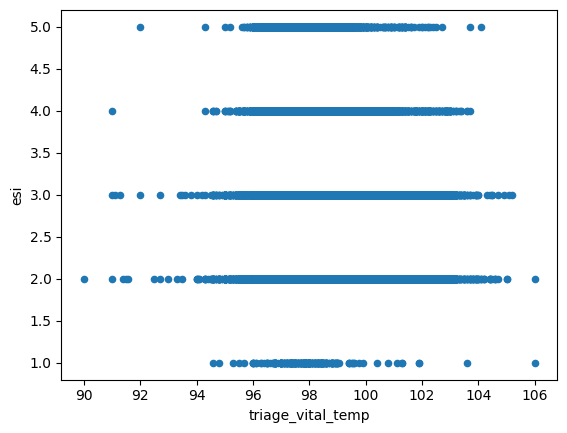

In [20]:
df.plot.scatter(x="triage_vital_temp", y="esi")
print(df.esi[df.loc[df["triage_vital_temp"] == max(df.triage_vital_temp)].index])
print(df.shape)

In [21]:
df

,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,age,cc_abdominalcramping,cc_abdominaldistention,cc_abdominalpain,...,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain,esi
0,97.0,18.0,63.0,146.0,85.0,97.0,40.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,97.8,16.0,78.0,134.0,78.0,97.0,66.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,98.4,18.0,101.0,133.0,72.0,97.0,84.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,98.5,18.0,76.0,143.0,87.0,98.0,86.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,97.8,17.0,88.0,155.0,75.0,98.0,87.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269544,98.0,16.0,71.0,117.0,74.0,95.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269545,98.1,16.0,89.0,114.0,75.0,94.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269546,97.5,18.0,89.0,125.0,82.0,94.0,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269547,97.5,18.0,89.0,135.0,92.0,98.0,50.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [22]:
df["esi"].value_counts()

3.0    117852
4.0     71472
2.0     67048
5.0     11835
1.0       262
Name: esi, dtype: int64

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
# Normalizing the data
numerical_cols = ['triage_vital_temp', 'triage_vital_hr', 'triage_vital_o2', 'triage_vital_sbp', 'triage_vital_dbp', 'triage_vital_rr', 'age']
for col in numerical_cols:
   df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [25]:
# Oversample and plot imbalanced dataset with SMOTE
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

In [26]:
df

,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,age,cc_abdominalcramping,cc_abdominaldistention,cc_abdominalpain,...,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain,esi
0,0.43750,0.163934,0.302752,0.363985,0.365854,0.948718,0.247191,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,0.48750,0.131148,0.440367,0.318008,0.323171,0.948718,0.539326,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.52500,0.163934,0.651376,0.314176,0.286585,0.948718,0.741573,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.53125,0.163934,0.422018,0.352490,0.378049,0.974359,0.764045,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.48750,0.147541,0.532110,0.398467,0.304878,0.974359,0.775281,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269544,0.50000,0.131148,0.376147,0.252874,0.298780,0.897436,0.348315,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269545,0.50625,0.131148,0.541284,0.241379,0.304878,0.871795,0.348315,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269546,0.46875,0.163934,0.541284,0.283525,0.347561,0.871795,0.359551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269547,0.46875,0.163934,0.541284,0.321839,0.408537,0.974359,0.359551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [27]:
X = df.drop(['esi'], axis=1).to_numpy()
y = df['esi'].to_numpy()
counter = Counter(y)
print(counter)

Counter({3.0: 117852, 4.0: 71472, 2.0: 67048, 5.0: 11835, 1.0: 262})


In [28]:
df

,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,age,cc_abdominalcramping,cc_abdominaldistention,cc_abdominalpain,...,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain,esi
0,0.43750,0.163934,0.302752,0.363985,0.365854,0.948718,0.247191,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,0.48750,0.131148,0.440367,0.318008,0.323171,0.948718,0.539326,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.52500,0.163934,0.651376,0.314176,0.286585,0.948718,0.741573,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.53125,0.163934,0.422018,0.352490,0.378049,0.974359,0.764045,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.48750,0.147541,0.532110,0.398467,0.304878,0.974359,0.775281,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269544,0.50000,0.131148,0.376147,0.252874,0.298780,0.897436,0.348315,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269545,0.50625,0.131148,0.541284,0.241379,0.304878,0.871795,0.348315,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269546,0.46875,0.163934,0.541284,0.283525,0.347561,0.871795,0.359551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269547,0.46875,0.163934,0.541284,0.321839,0.408537,0.974359,0.359551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


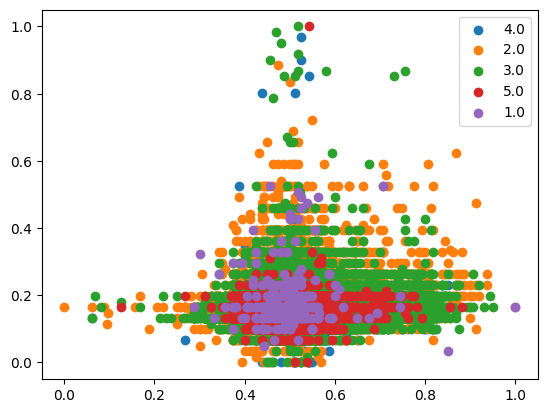

In [29]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [30]:
over = SMOTE(sampling_strategy={1: 117852, 2: 117852, 3: 117852, 4: 117852, 5: 117852})
# under = RandomUnderSampler(sampling_strategy={1: 117852, 2: 117852, 3: 117852, 4: 117852, 5: 117852})
steps = [('o', over),]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)

In [31]:
counter = Counter(y)
print(counter)

Counter({4.0: 117852, 2.0: 117852, 3.0: 117852, 5.0: 117852, 1.0: 117852})


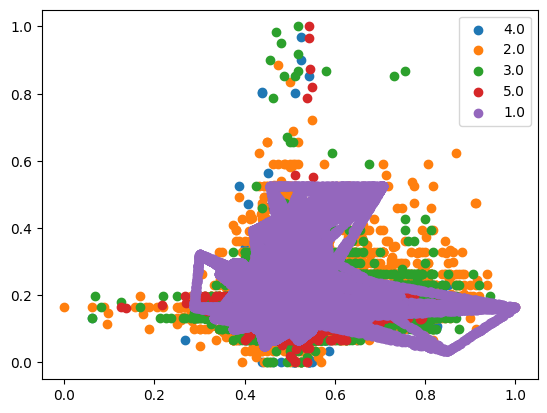

In [32]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [33]:
df

,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,age,cc_abdominalcramping,cc_abdominaldistention,cc_abdominalpain,...,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain,esi
0,0.43750,0.163934,0.302752,0.363985,0.365854,0.948718,0.247191,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,0.48750,0.131148,0.440367,0.318008,0.323171,0.948718,0.539326,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.52500,0.163934,0.651376,0.314176,0.286585,0.948718,0.741573,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.53125,0.163934,0.422018,0.352490,0.378049,0.974359,0.764045,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.48750,0.147541,0.532110,0.398467,0.304878,0.974359,0.775281,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269544,0.50000,0.131148,0.376147,0.252874,0.298780,0.897436,0.348315,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269545,0.50625,0.131148,0.541284,0.241379,0.304878,0.871795,0.348315,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269546,0.46875,0.163934,0.541284,0.283525,0.347561,0.871795,0.359551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
269547,0.46875,0.163934,0.541284,0.321839,0.408537,0.974359,0.359551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [34]:
import numpy as np
import pandas as pd

# Concatenate X and y numpy arrays
Xy = np.concatenate((X, y.reshape(-1, 1)), axis=1)

In [35]:
!pwd

/media/csuser/DATA/ARTEMIS/yale


In [37]:

# Create a pandas DataFrame from the concatenated array
#new_keys.remove('esi')
#new_keys.append('esi')
df = pd.DataFrame(data=Xy, columns=new_keys)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589260 entries, 0 to 589259
Columns: 208 entries, triage_vital_temp to esi
dtypes: float64(208)
memory usage: 935.1 MB


In [40]:
df.to_csv('/media/csuser/DATA/ARTEMIS/yale/yale_triage_smote.csv', index=False)

In [19]:
# # clean up the first column since its unnamed and has indices
# import pandas as pd

# # Read the CSV file
# df = pd.read_csv('/media/csuser/DATA/ARTEMIS/yale/yale_triage_smote.csv')

# # Remove the first column and all data under it
# df = df.iloc[:, 1:]

# # Write the modified DataFrame back to the CSV file
# df.to_csv('/media/csuser/DATA/ARTEMIS/yale/yale_triage_smote.csv', index=False)


# TRAIN

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import torch

In [48]:
df = pd.read_csv('/media/csuser/DATA/ARTEMIS/yale/yale_triage_smote.csv')

# Split the data into features (X) and target (y)
print(df.shape)
x = df.drop(['esi'], axis=1)
y = df['esi']

x = x.to_numpy().astype(np.float32)
y = y.to_numpy().reshape(-1,1).astype(np.int_)

print(np.asarray(x))

# x = tf.constant(np.asarray(x), dtype=tf.float64)
# y = tf.constant(np.asarray(y).reshape(-1, 1), dtype=tf.float64)

print(x.shape)

# convert to one hot vector
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(y)
print(ohe.categories_)

y = ohe.transform(y)
y.shape

(589260, 208)
[[0.4375     0.16393442 0.3027523  ... 0.         0.         0.        ]
 [0.4875     0.13114753 0.44036698 ... 0.         0.         0.        ]
 [0.525      0.16393442 0.6513761  ... 0.         0.         0.        ]
 ...
 [0.5299843  0.19008158 0.45964456 ... 0.         0.         0.        ]
 [0.512652   0.16413374 0.6882965  ... 0.         0.         0.        ]
 [0.49592218 0.10739045 0.30115804 ... 0.         0.         0.        ]]
(589260, 207)
[array([1, 2, 3, 4, 5])]


(589260, 5)

In [49]:
df.head()

,triage_vital_temp,triage_vital_rr,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_o2,age,cc_abdominalcramping,cc_abdominaldistention,cc_abdominalpain,...,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain,esi
0,0.43750,0.163934,0.302752,0.363985,0.365854,0.948718,0.247191,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,0.48750,0.131148,0.440367,0.318008,0.323171,0.948718,0.539326,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.52500,0.163934,0.651376,0.314176,0.286585,0.948718,0.741573,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.53125,0.163934,0.422018,0.352490,0.378049,0.974359,0.764045,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.48750,0.147541,0.532110,0.398467,0.304878,0.974359,0.775281,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [50]:
# # yale model
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    dense1 = layers.Dense(units=50, activation='ReLU', use_bias=True,)(inputs)
    dense2 = layers.Dense(units=50, activation='ReLU', use_bias=True,)(dense1)
    dense3 = layers.Dense(units=50, activation='ReLU', use_bias=True,)(dense2)
    dense4 = layers.Dense(units=50, activation='ReLU', use_bias=True,)(dense3)
    output = layers.Dense(units=num_classes, activation='softmax')(dense4)
    return keras.Model(inputs, output)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=0.20, random_state=1)

In [52]:
model = make_model(input_shape=(207), num_classes=y[0].shape[0])
model.compile(
    optimizer=keras.optimizers.Adamax(learning_rate=0.01, weight_decay=1e-6),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=["accuracy"],
)
model.summary()

# make the save callback
best_model_path = '/media/csuser/DATA/ARTEMIS/models/yale_smote'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=best_model_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# load the saved model by:
# model.load_weights(best_model_path)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 207)]             0         
                                                                 
 dense_10 (Dense)            (None, 50)                10400     
                                                                 
 dense_11 (Dense)            (None, 50)                2550      
                                                                 
 dense_12 (Dense)            (None, 50)                2550      
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 5)                 255       
                                                                 
Total params: 18,305
Trainable params: 18,305
Non-trainable

In [53]:
history = (model.fit(X_train, y_train, epochs=5000, validation_data=(X_val, y_val), callbacks=[model_checkpoint_callback]))
#history = (model.fit(X_train, y_train, epochs=5000, validation_data=(X_val, y_val)))

Epoch 1/5000
11786/11786 [==============================] - 8s 655us/step - loss: 0.0902 - accuracy: 0.6612 - val_loss: 0.0861 - val_accuracy: 0.6735
Epoch 2/5000
11786/11786 [==============================] - 7s 634us/step - loss: 0.0835 - accuracy: 0.6900 - val_loss: 0.0826 - val_accuracy: 0.6901
Epoch 3/5000
11786/11786 [==============================] - 7s 624us/step - loss: 0.0811 - accuracy: 0.6997 - val_loss: 0.0819 - val_accuracy: 0.6963
Epoch 4/5000
11786/11786 [==============================] - 7s 619us/step - loss: 0.0797 - accuracy: 0.7050 - val_loss: 0.0796 - val_accuracy: 0.7058
Epoch 5/5000
11786/11786 [==============================] - 7s 621us/step - loss: 0.0786 - accuracy: 0.7092 - val_loss: 0.0796 - val_accuracy: 0.7055
Epoch 6/5000
11786/11786 [==============================] - 7s 614us/step - loss: 0.0779 - accuracy: 0.7117 - val_loss: 0.0784 - val_accuracy: 0.7105
Epoch 7/5000
11786/11786 [==============================] - 7s 626us/step - loss: 0.0773 - accuracy:

# PREDICT AND PLOT

##### For 5000 epochs, from data saved in history

In [54]:
!pwd

/media/csuser/DATA/ARTEMIS/yale


In [55]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


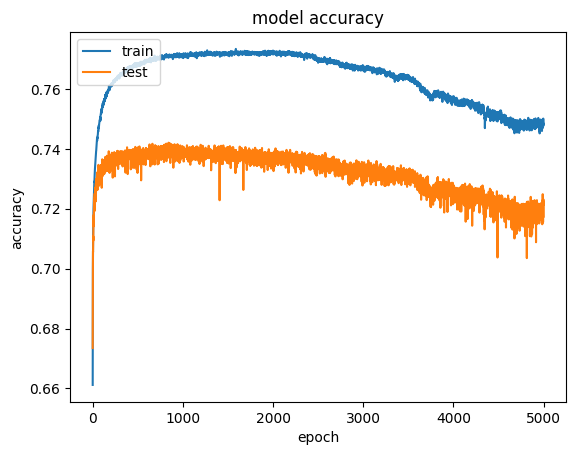

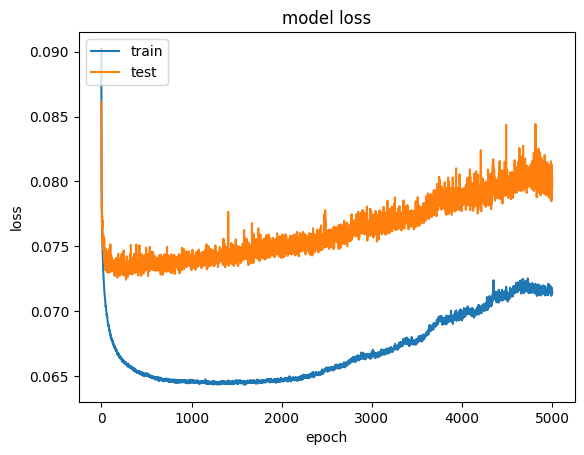

In [56]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/media/csuser/DATA/ARTEMIS/yale/figs/NN_ACCURACYvsEPOCHS.png', dpi=500)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/media/csuser/DATA/ARTEMIS/yale/figs/NN_LOSSvsEPOCHS.png', dpi=500)
plt.show()

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model.load_weights('/media/csuser/DATA/ARTEMIS/models/yale_smote')

(117852, 207)
3683/3683 [==============================] - 2s 334us/step
(117852, 5)
(117852, 5)
[4 4 0 ... 1 4 1]
[4 3 0 ... 1 3 1]


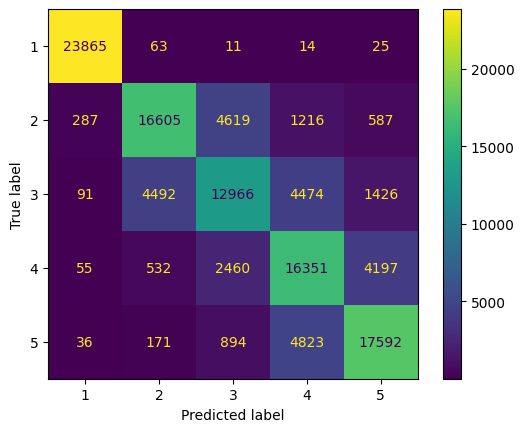

In [58]:
# CONFUSION MATRIX
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report, recall_score, ConfusionMatrixDisplay
from numpy import argmax

print(X_test.shape)
y_pred = model.predict(X_test)
print(y_test.shape)
print(y_pred.shape)
y_test = argmax(a=y_test, axis=1)
y_pred = argmax(a=y_pred, axis=1)
print(y_test)
print(y_pred)
ConfusionMatrixDisplay.from_predictions(y_test+1, y_pred+1)
plt.savefig('/media/csuser/DATA/ARTEMIS/yale/figs/NN_confusion_yale_smote.png', dpi=500)

In [59]:
y_pred

array([4, 3, 0, ..., 1, 3, 1])

In [60]:
TP = np.zeros(5)
FP = np.zeros(5)
FN = np.zeros(5)

for i in range(5):
    for j in range(len(y_test)):
        if y_test[j] == i and y_pred[j] == i:
            TP[i] += 1
        elif y_test[j] == i and y_pred[j] != i:
            FN[i] += 1
        elif y_test[j] != i and y_pred[j] == i:
            FP[i] += 1
print(TP, FN, FP)

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Overall accuracy
ACC = np.zeros(5)
class_totals = np.zeros(5)
for i in range(5):
    for j in range(len(y_test)):
        class_totals[y_test[j]] += 1
        if y_test[j] == y_pred[j]:
            ACC[y_test[j]] += 1
ACC /= class_totals

# F1
F1 = 2 * (PPV * TPR) / (PPV + TPR)

print(PPV, TPR, F1, ACC)

[23865. 16605. 12966. 16351. 17592.] [  113.  6709. 10483.  7244.  5924.] [  469.  5258.  7984. 10527.  6235.]
[0.98072656 0.75950236 0.61890215 0.60834139 0.73832207] [0.99528735 0.71223299 0.55294469 0.6929858  0.74808641] [0.99528735 0.71223299 0.55294469 0.6929858  0.74808641]


In [61]:
acc = accuracy_score(y_test, y_pred)
print('Acc: ', acc)

prec = precision_score(y_test, y_pred, average='weighted')
print('Prec: ', prec)

recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: ', recall)

Acc:  0.7414299290635713
Prec:  0.7420470825250738
Recall:  0.7414299290635713
